<a href="https://colab.research.google.com/github/satwikakallem/Home_Assignment1/blob/main/home_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

def perform_convolution(input_matrix, kernel, stride, padding):
    """Performs convolution using TensorFlow.

    Args:
        input_matrix: A NumPy array representing the input matrix.
        kernel: A NumPy array representing the convolution kernel.
        stride: The stride for the convolution.
        padding: The padding type ('VALID' or 'SAME').

    Returns:
        A NumPy array representing the output feature map.
    """

    # Add batch and channel dimensions
    input_tensor = tf.constant(input_matrix.reshape((1, 5, 5, 1)), dtype=tf.float32)
    kernel_tensor = tf.constant(kernel.reshape((3, 3, 1, 1)), dtype=tf.float32)

    # Perform convolution
    output_tensor = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, stride, stride, 1], padding=padding)

    # Remove batch and channel dimensions and convert to NumPy array
    output_array = output_tensor.numpy().reshape(output_tensor.shape[1], output_tensor.shape[2])

    return output_array

# Define input matrix and kernel
input_matrix = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
])

kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

# Perform convolution with different parameters
results = {}

results['Stride 1, Padding VALID'] = perform_convolution(input_matrix, kernel, 1, 'VALID')
results['Stride 1, Padding SAME'] = perform_convolution(input_matrix, kernel, 1, 'SAME')
results['Stride 2, Padding VALID'] = perform_convolution(input_matrix, kernel, 2, 'VALID')
results['Stride 2, Padding SAME'] = perform_convolution(input_matrix, kernel, 2, 'SAME')

# Print the output feature maps
for key, value in results.items():
    print(f"\n{key}:\n{value}")


Stride 1, Padding VALID:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Stride 1, Padding SAME:
[[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]]

Stride 2, Padding VALID:
[[0. 0.]
 [0. 0.]]

Stride 2, Padding SAME:
[[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]]


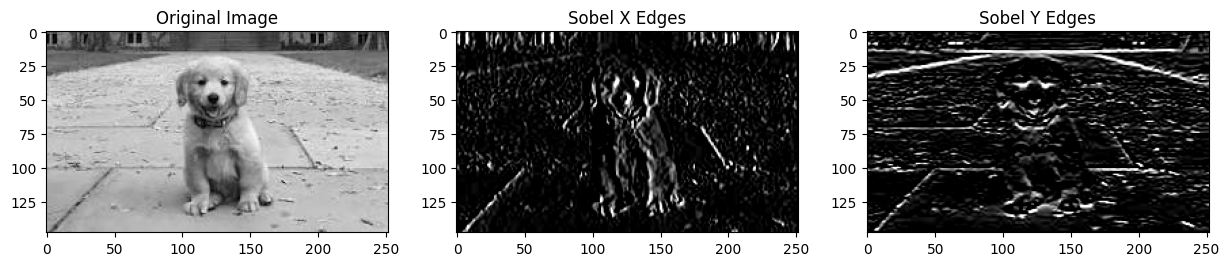

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image (replace 'your_image.jpg' with your image path)
img = cv2.imread('dogg.jpeg', cv2.IMREAD_GRAYSCALE)

# Sobel filters
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Apply Sobel filters
edges_x = cv2.filter2D(img, -1, sobel_x)
edges_y = cv2.filter2D(img, -1, sobel_y)

# Display images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(edges_x, cmap='gray')
plt.title('Sobel X Edges')

plt.subplot(1, 3, 3)
plt.imshow(edges_y, cmap='gray')
plt.title('Sobel Y Edges')

plt.show()

In [4]:
import tensorflow as tf
import numpy as np

# Create a random 4x4 matrix
input_matrix = np.random.rand(4, 4)
input_tensor = tf.constant(input_matrix.reshape(1, 4, 4, 1), dtype=tf.float32)

# Max Pooling
max_pool = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))
max_pool_output = max_pool(input_tensor).numpy().reshape(2, 2)

# Average Pooling
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2))
avg_pool_output = avg_pool(input_tensor).numpy().reshape(2, 2)

# Print results
print("Original Matrix:")
print(input_matrix)
print("\nMax Pooled Matrix:")
print(max_pool_output)
print("\nAverage Pooled Matrix:")
print(avg_pool_output)

Original Matrix:
[[0.91938459 0.05799937 0.46627321 0.06699521]
 [0.95202172 0.73021901 0.69443639 0.01546049]
 [0.89837568 0.81406357 0.79061845 0.93009489]
 [0.97913334 0.36518765 0.68367942 0.1068361 ]]

Max Pooled Matrix:
[[0.9520217 0.6944364]
 [0.9791333 0.9300949]]

Average Pooled Matrix:
[[0.66490614 0.3107913 ]
 [0.7641901  0.6278072 ]]


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_alexnet():
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)), # Assuming 227x227x3 input
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax') # 10 output classes
    ])
    return model

alexnet_model = create_alexnet()
alexnet_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

def residual_block(input_tensor, filters):
    x = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(input_tensor)
    x = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
    x = layers.Add()([input_tensor, x]) # Skip connection
    x = layers.Activation('relu')(x)
    return x

def create_resnet():
    input_tensor = layers.Input(shape=(224, 224, 3)) # Assuming 224x224x3 input
    x = layers.Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(input_tensor)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    output_tensor = layers.Dense(10, activation='softmax')(x) # 10 output classes
    model = models.Model(inputs=input_tensor, outputs=output_tensor)
    return model

resnet_model = create_resnet()
resnet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 112, 112, 64)   │          9,472 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 56, 56, 64)     │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 56, 56, 64)     │              0 │ max_pooling2d_4[0][0], │
│                           │                        │                │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 56, 56, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 56, 56, 64)     │              0 │ activation[0][0],      │
│                           │                        │                │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 56, 56, 64)     │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 200704)         │              0 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │     25,690,240 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 10)             │          1,290 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 25,848,714 (98.61 MB)

 Trainable params: 25,848,714 (98.61 MB)

 Non-trainable params: 0 (0.00 B)